# Descriptive statistics

Masterproject David Degen:

In this notebook, we consider descriptive statistics of the dataset as well as the corerlation of entries of the scattering phase function $P_{11}$ and the polarized phase function $P_{\operatorname{ppf}}$ for different wavelengths.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib as mpl
from matplotlib import cm
from helper_functions.preprocessing import no_path_find_pre
import re

In [2]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

plt.style.use('plot_style.txt')

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

plot_dir = '/data/project/general/aerosolretriev/aerosol_results_d/plots_semesterarbeit/data'

In [3]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

Load Data, containing all wavelengths

In [4]:
# automatically load dataset with all wavelengths: pre_log_ts-0.2_ta-5-85-96-176
train_data_obs, train_data_stat, test_data_obs, test_data_stat = no_path_find_pre(dat_set_choice=0, pre_choice=4)

Available Data sets:
{0: 'ML_data_unidmoal_2021_03', 1: 'experiment', 2: 'simulation_test'}
ML_data_unidmoal_2021_03 was chosen.
From the preprocessings:
{0: 'pre_log_ts-0.2_wl-532_ta-15-85-93-164', 1: 'pre_ts-0.2_P11_wl-532_sc-None', 2: 'pre_log_ts-0.2_wl-450-532-630_sc-None', 3: 'pre_ts-0.2_P11', 4: 'pre_log_ts-0.2_ta-5-85-96-176', 5: 'pre_log_ts-0.2_wl-450-630_sc-None', 6: 'pre_log_ts-0.2_wl-532_ta-5-85-96-176', 7: 'pre_ts-0.2_wl-532_sc-None', 8: 'pre_log_ts-0.2_P11_wl-532_sc-None', 9: 'pre_log_ts-0.2_wl-532_sc-None', 10: 'pre_log_ts-0.2_wl-450-630_ta-5-85-96-176'}
pre_log_ts-0.2_ta-5-85-96-176 was chosen.
Matched the following data sets:
Training data: training_dataset.hdf5
Test data: test_dataset.hdf5
Command executed:
pd.read_hdf("/data/user/degen_d/aerosol/aerosol_data/ML_data_unidmoal_2021_03//pre_log_ts-0.2_ta-5-85-96-176/training_dataset.hdf5", key='dvar')


In [21]:
# Reconstruct whole dataset from training and test set
#obs = np.vstack([train_data_obs, test_data_obs])
obs =  pd.concat([train_data_obs, test_data_obs],ignore_index=True)

Sort observational data by wavelength

In [6]:
obs_450 = obs.loc[:, list(obs.filter(regex='0.450', axis=1))]
obs_532 = obs.loc[:, list(obs.filter(regex='0.532', axis=1))]
obs_630 = obs.loc[:, list(obs.filter(regex='0.630', axis=1))]

Sort by P11, P12

In [7]:
p11_450 = obs_450.loc[:, list(obs_450.filter(regex='P11', axis=1))]
p11_532 = obs_532.loc[:, list(obs_532.filter(regex='P11', axis=1))]
p11_630 = obs_630.loc[:, list(obs_630.filter(regex='P11', axis=1))]

p12_450 = obs_450.loc[:, list(obs_450.filter(regex='P12', axis=1))]
p12_532 = obs_532.loc[:, list(obs_532.filter(regex='P12', axis=1))]
p12_630 = obs_630.loc[:, list(obs_630.filter(regex='P12', axis=1))]

Create common column names (for computing correlation)

In [8]:
column_names = [re.sub('_0.450', '', c_name) for c_name in list(p11_450.columns)]
column_names = [re.sub('P11_', '', c_name) for c_name in column_names]
p11_450.set_axis(column_names, inplace = True, axis=1)
p11_532.set_axis(column_names, inplace = True, axis=1)
p11_630.set_axis(column_names, inplace = True, axis=1)

p12_450.set_axis(column_names, inplace = True, axis=1)
p12_532.set_axis(column_names, inplace = True, axis=1)
p12_630.set_axis(column_names, inplace = True, axis=1)

columns = [int(i) for i in column_names]

In [9]:
# Plot styling
plt.style.use('plot_style.txt')
plt.rcParams.update({'font.size': 20, 'lines.linewidth': 0.8})

# Ticks
loc = plticker.MultipleLocator(base=30.0)


# Colors
cmap = cm.get_cmap('magma')
colors = cmap([0.13, 0.5, 0.8])

## Descriptive statics

For $\lambda = 532$

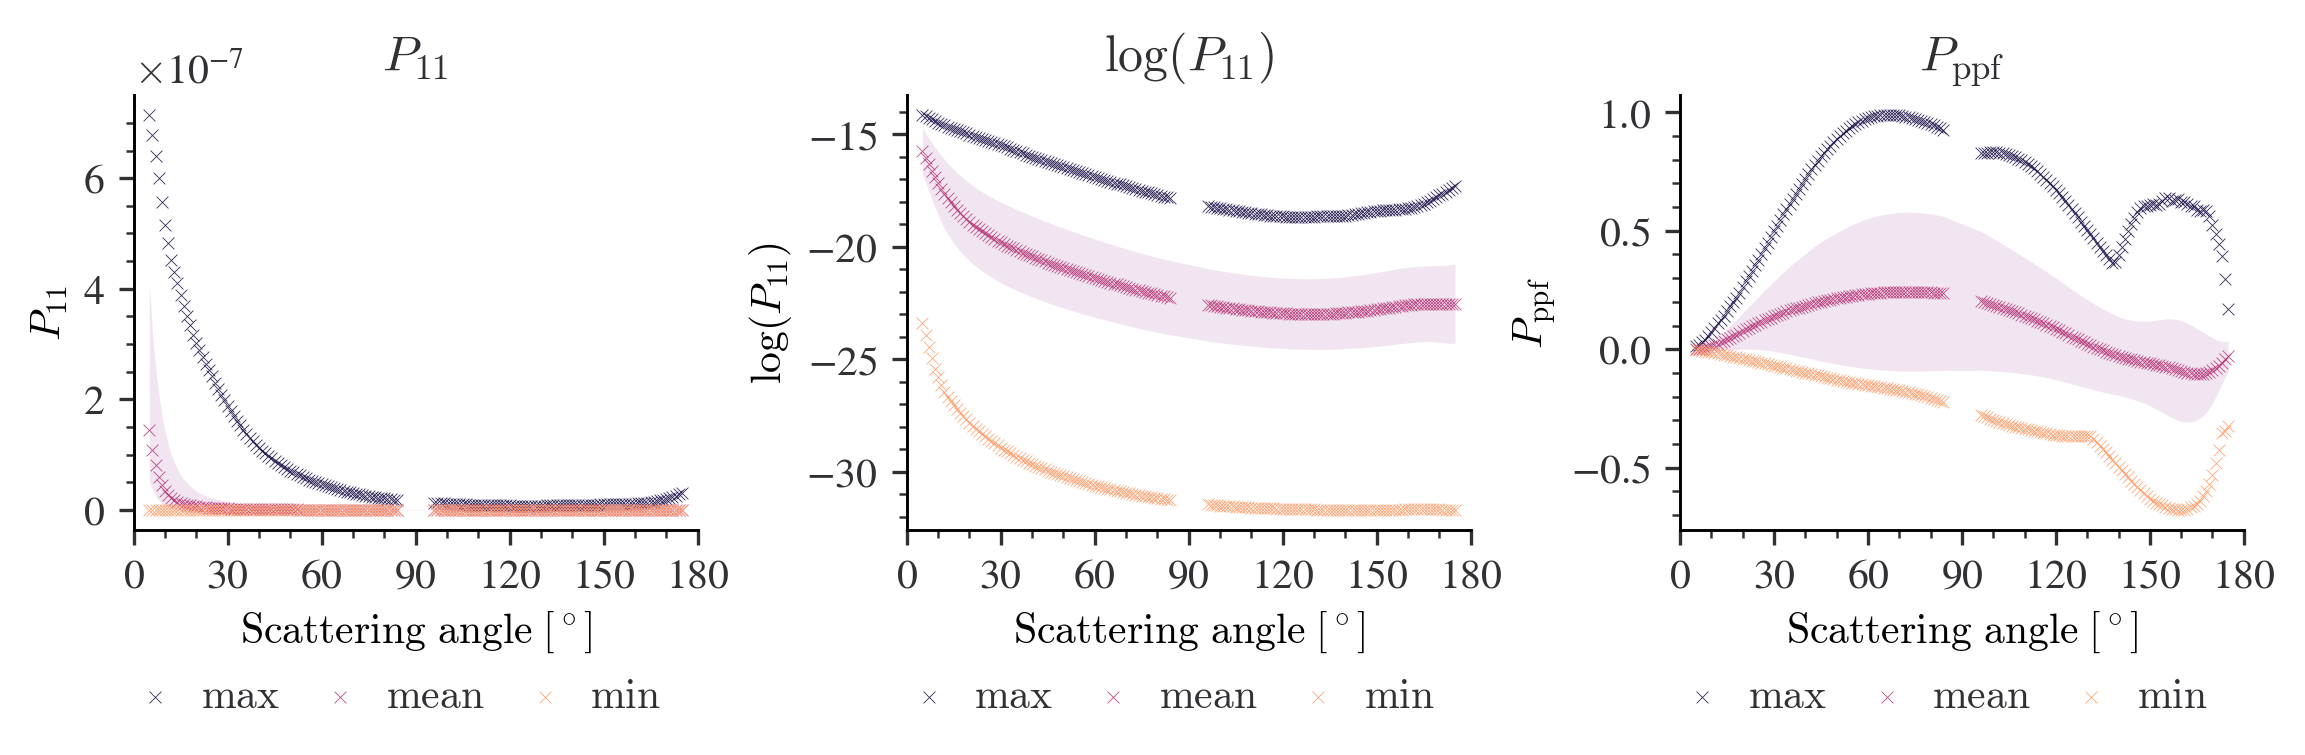

In [12]:
scat_style = {'s': 8, 'marker': 'x', 'alpha': 0.9, 'linewidths': 0.2}


figsize = set_size(textwidth, subplots=(1, 3), scale_factor=1.2, rescale_height=1.4)
legend_anchor = (-0.05, -0.45, 1, 0.0)
legend_kwrgs = {'loc': "lower left", 'mode': "expand",
                'borderaxespad': 0, 'handletextpad': 0.1, 'frameon': False, 'ncol': 3}
#grid_kws = {"width_ratios": tuple([0.95/3 for i in range(3)]), "wspace": 0.2}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=figsize) # sharex=True, sharey=True,
fig.tight_layout()


ax1 = axs[0]
ax1.set_title("$P_{11}$")
ax1.fill_between(columns, np.exp(p11_532.mean(axis=0) - p11_532.std(axis=0)), 
                 np.exp(p11_532.mean(axis=0) + p11_532.std(axis=0)), 
                 alpha=0.2, linewidth=0.0)
ax1.scatter(columns, np.exp(p11_532.max(axis=0)), label='$\operatorname{max}$', color=colors[0], **scat_style)
ax1.scatter(columns, np.exp(p11_532.mean(axis=0)), label='$\operatorname{mean}$', color=colors[1], **scat_style)
#ax1.scatter(columns, , label='$\operatorname{Var}(P_{11})$', color=colors[1], **scat_style)
ax1.scatter(columns, np.exp(p11_532.min(axis=0)), label='$\operatorname{min}$', color=colors[2], **scat_style)
ax1.set_xlabel("$\operatorname{Scattering\ angle}$ $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
ax1.set_ylabel("$P_{11}$")
ax1.legend(bbox_to_anchor=legend_anchor, **legend_kwrgs)
ax1.xaxis.set_major_locator(loc)

ax1 = axs[1]
ax1.set_title("$\log(P_{11})$")
ax1.fill_between(columns, p11_532.mean(axis=0) - p11_532.std(axis=0), 
                 p11_532.mean(axis=0) + p11_532.std(axis=0), 
                 alpha=0.2, linewidth=0.0)
ax1.scatter(columns, p11_532.max(axis=0), label='$\operatorname{max}$', color=colors[0], **scat_style)
ax1.scatter(columns, p11_532.mean(axis=0), label='$\operatorname{mean}$', color=colors[1], **scat_style)
ax1.scatter(columns, p11_532.min(axis=0), label='$\operatorname{min}$', color=colors[2], **scat_style)
ax1.set_xlabel("$\operatorname{Scattering\ angle}$ $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
ax1.set_ylabel("$\log(P_{11})$")
#ax1.legend()
ax1.legend(bbox_to_anchor=legend_anchor, **legend_kwrgs)
# ax1.legend(bbox_to_anchor=legend_anchor, loc="lower left",
#            mode="expand", borderaxespad=0, 
#            handletextpad=0.1, ncol=2, frameon=False, shadow=False, columnspacing=1.5)
ax1.xaxis.set_major_locator(loc)

ax1 = axs[2]
ax1.set_title("$P_{\operatorname{ppf}}$")
ax1.fill_between(columns, p12_532.mean(axis=0) - p12_532.std(axis=0), 
                 p12_532.mean(axis=0) + p12_532.std(axis=0), 
                 alpha=0.2, linewidth=0.0, edgecolor='face')
ax1.scatter(columns, p12_532.max(axis=0), label='$\operatorname{max}$', color=colors[0], **scat_style)
ax1.scatter(columns, p12_532.mean(axis=0), label='$\operatorname{mean}$', color=colors[1], **scat_style)
ax1.scatter(columns, p12_532.min(axis=0), label='$\operatorname{min}$', color=colors[2], **scat_style)
ax1.set_xlabel("$\operatorname{Scattering\ angle}$ $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
ax1.set_ylabel("$P_{\operatorname{ppf}}$")
#ax1.legend()
ax1.legend(bbox_to_anchor=legend_anchor, **legend_kwrgs)

ax1.xaxis.set_major_locator(loc)
#fig.tight_layout(w_pad=0.1)
if save_to_file:
    fig.savefig(f'{plot_dir}/data_stats.pdf', dpi=1000, transparent=False, bbox_inches="tight")
plt.show()

## Correlations

In [13]:
# In between wavelengths
# P11
cor_p11_450_532 = (p11_450).corrwith(p11_532)
cor_p11_450_630 = (p11_450).corrwith(p11_630)
cor_p11_532_630 = (p11_532).corrwith(p11_630)
# P12
cor_p12_450_532 = (p12_450).corrwith(p12_532)
cor_p12_450_630 = (p12_450).corrwith(p12_630)
cor_p12_532_630 = (p12_532).corrwith(p12_630)
# Within wavelengths
cor_450 = (p11_450).corrwith(p12_450)
cor_532 = (p11_532).corrwith(p12_532)
cor_630 = (p11_630).corrwith(p12_630)

Note that StandardScaler doesn't change any correlation, nor does the application of the logarithm.

In [20]:
scat_style = {'s': 8, 'marker': 'x', 'alpha': 0.9, 'linewidths': 0.2}

figsize = set_size(textwidth, subplots=(1, 3), scale_factor=1.2, rescale_height=1.4)
legend_anchor = (-0.3,-0.5,1.4,0.0) # (0.15,-0.7,0.9,0.4)  # (-0.1,-0.65,1.15,0.0)
legend_kwrgs = {'loc': "lower left", 'mode': "expand",
                'borderaxespad': 0, 'handletextpad': -0.4, 'frameon': False, 'ncol': 3}

#grid_kws = {"width_ratios": tuple([0.95/3 for i in range(3)]), "wspace": 0.2}
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=figsize) # sharex=True, sharey=True,
fig.tight_layout()
#fig.suptitle("$\operatorname{Correlation}$ $\operatorname{of}$ $\ldots$", y=1.12)
#fig.subplots_adjust(bottom=0.1, left=0.1, right=1.4, top=0.99)
ax1 = axs[0]
ax1.set_title("$\operatorname{Correlation}$ $\operatorname{of}$ $\log(P_{11})$ $\operatorname{between}$ \n $\operatorname{pairs}$ $\operatorname{of}$ $\operatorname{wavelengths}$")
#ax1.set_title(" $\log(P_{11})$ $\operatorname{between}$ $\operatorname{pairs}$  \n$\operatorname{of}$ $\operatorname{wavelengths}$")
ax1.scatter(columns, cor_p11_450_532, label='$(450,\,532)$', color=colors[0], **scat_style)
ax1.scatter(columns, cor_p11_450_630, label='$(450,\,630)$', color=colors[1], **scat_style)
ax1.scatter(columns, cor_p11_532_630, label='$(532,\, 630)$', color=colors[2], **scat_style)
ax1.set_xlabel("$\operatorname{Scattering\ angle}$ $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
ax1.set_ylabel("$\operatorname{Pearson}$ $\operatorname{correlation}$ $\operatorname{coefficient}$")
ax1.legend(bbox_to_anchor=(-0.35,-0.5,1.4,0.0), **legend_kwrgs)
ax1.xaxis.set_major_locator(loc)

ax1 = axs[1]
#ax1.set_title("$\operatorname{Correlation}$ $\operatorname{of}$ $P_{PPF}$ \n$\operatorname{between}$ $\operatorname{pairs}$  \n$\operatorname{of}$ $\operatorname{wavelengths}$")
#ax1.set_title("$\ldots$ $P_{PPF}$ $\operatorname{between}$ $\operatorname{pairs}$  \n$\operatorname{of}$ $\operatorname{wavelengths}$")
ax1.set_title("$\operatorname{Correlation}$ $\operatorname{of}$ $P_{\operatorname{ppf}}$ $\operatorname{between}$ \n $\operatorname{pairs}$ $\operatorname{of}$ $\operatorname{wavelengths}$")
ax1.scatter(columns, cor_p12_450_532, label='$(450,\, 532)$', color=colors[0], **scat_style)
ax1.scatter(columns, cor_p12_450_630, label='$(450,\, 630)$', color=colors[1], **scat_style)
ax1.scatter(columns, cor_p12_532_630, label='$(532,\, 630)$', color=colors[2], **scat_style)
ax1.set_xlabel("$\operatorname{Scattering\ angle}$ $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
ax1.set_ylabel("$\operatorname{Pearson}$ $\operatorname{correlation}$ $\operatorname{coefficient}$")
#ax1.legend()
ax1.legend(bbox_to_anchor=(-0.3,-0.5,1.4,0.0), **legend_kwrgs)
ax1.xaxis.set_major_locator(loc)

ax1 = axs[2]
ax1.set_title("$\operatorname{Correlation}$ $\operatorname{of}$ $\log(P_{11})$ $\operatorname{with}$ $P_{PPF}$ \n$\operatorname{within}$ $\operatorname{wavelengths}$")
ax1.scatter(columns, cor_450, label='$450$', color=colors[0], **scat_style)
ax1.scatter(columns, cor_532, label='$532$', color=colors[1], **scat_style)
ax1.scatter(columns, cor_630, label='$630$', color=colors[2], **scat_style)
ax1.set_xlabel("$\operatorname{Scattering\ angle}$ $[^\circ]$")
ax1.locator_params(axis = 'x', tight=True, nbins=40)
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax1.set_xlim(0, 180)
ax1.set_ylabel("$\operatorname{Pearson}$ $\operatorname{correlation}$ $\operatorname{coefficient}$")
#ax1.legend()
ax1.legend(bbox_to_anchor=(-0.1, -0.5, 1, 0.0), 
           loc="lower left", mode="expand", borderaxespad=0, handletextpad=0.1, ncol=3, frameon=False)

ax1.xaxis.set_major_locator(loc)
#fig.tight_layout(w_pad=0.1)
if save_to_file:
    fig.savefig(f'{plot_dir}/correlation.pdf', dpi=1000, transparent=False, bbox_inches="tight")
plt.show()